In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [39]:
spotify_data = pd.read_csv('/content/spotify dataset.csv')

In [40]:
# Drop non-numeric columns and columns that are not suitable for modeling
X = spotify_data.drop(columns=['track_id', 'track_name'])
y = spotify_data['track_popularity']

In [41]:
# Encode categorical variables if there are any
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

In [42]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Remove non-numeric columns before calculating correlation matrix
numeric_data = spotify_data.select_dtypes(include=['float64', 'int64'])

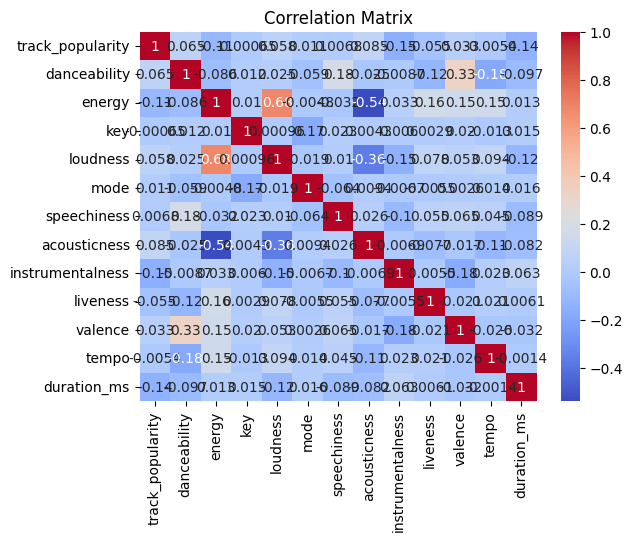

In [50]:
# Show correlation matrix of features according to the dataset
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Build your model (example using Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Make predictions
predictions = model.predict(X_test)

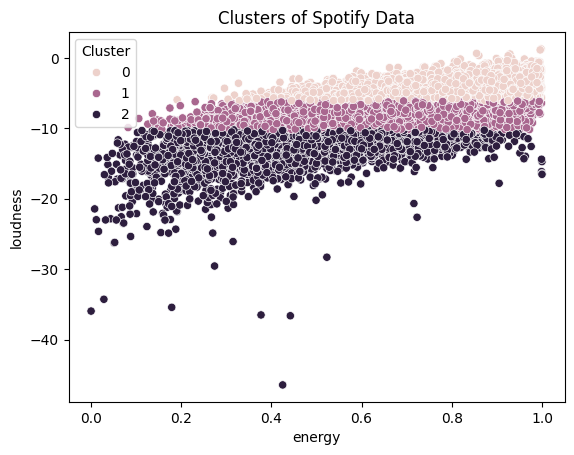

In [45]:
# Plot clusters
sns.scatterplot(data=spotify_data, x='energy', y='loudness', hue='Cluster')
plt.title('Clusters of Spotify Data')
plt.show()

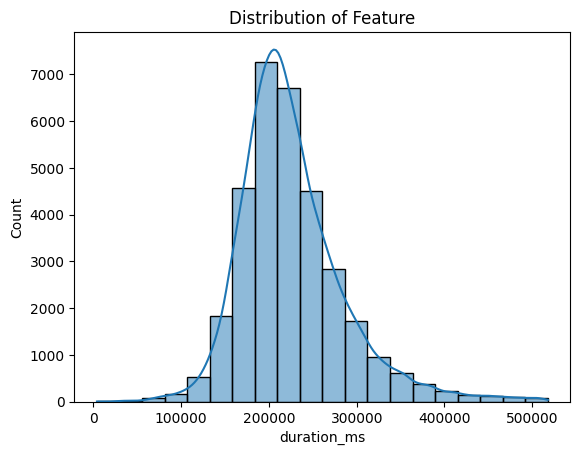

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw plots to provide essential information and derive insights
# Example:
# Plot distribution of a feature
sns.histplot(spotify_data['duration_ms'], bins=20, kde=True)
plt.xlabel('duration_ms')
plt.ylabel('Count')
plt.title('Distribution of Feature')
plt.show()

# Additional plots for analysis and insights

In [51]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(spotify_data[['energy', 'loudness']])
spotify_data['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


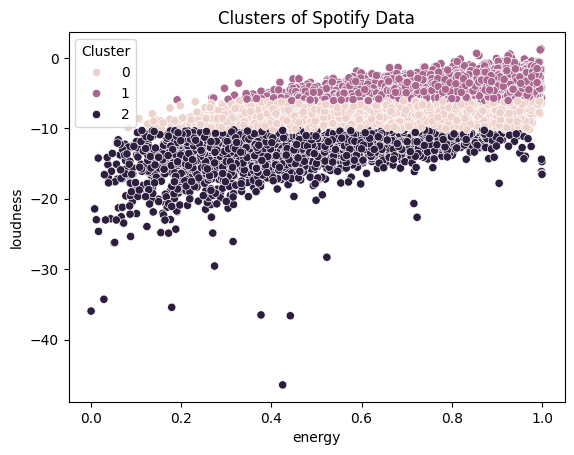

In [13]:
from sklearn.cluster import KMeans

# Find and plot different clusters according to different parameters
# Example:
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(spotify_data[['energy', 'loudness']])
spotify_data['Cluster'] = cluster_labels

# Plot clusters
sns.scatterplot(data=spotify_data, x='energy', y='loudness', hue='Cluster')
plt.title('Clusters of Spotify Data')
plt.show()

# Additional clustering based on different parameters

In [52]:
# Evaluate model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.08481802954164763
